# White blood cell classification

In [4]:
import tensorflow as tf

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=bf99b2e38638247a5d28c3c2a021c67689528d3f85b14d371ebba6b97ab6dcef
  Stored in directory: c:\users\ajays\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=1c6c337ca558eb8f1384b5cf7aa386b677de9293a09a377930039b7032a179ac
  Stored in directory: c:\users\ajays\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart


In [27]:
import gradio as gr

In [5]:
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [7]:
Eosinophil = os.path.join('TRAIN/Eosinophil')
Lymphocyte=os.path.join('TRAIN/Lymphocyte')
Monocyte=os.path.join('TRAIN/Monocyte')
Neutrophil=os.path.join(str('TRAIN/Neutrophil'))

In [8]:
print('total Eosinophil images:', len(os.listdir(Eosinophil)))
print('total Lymphocyte images:', len(os.listdir(Lymphocyte)))
print('total Monocyte images:', len(os.listdir(Monocyte)))
print('total Neutrophil images:', len(os.listdir(Neutrophil)))

total Eosinophil images: 2497
total Lymphocyte images: 2478
total Monocyte images: 2483
total Neutrophil images: 2499


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Prepring data for image segmentation

In [10]:
Eosinophil_names = os.listdir(Eosinophil)
print(Eosinophil_names[:5])

Lymphocyte_names = os.listdir(Lymphocyte)
print(Lymphocyte_names[:5])


Monocyte_namess = os.listdir(Monocyte)
print(Monocyte_namess[:5])


Neutrophil_names = os.listdir(Neutrophil)
print(Neutrophil_names[:5])


['_0_1169.jpeg', '_0_1414.jpeg', '_0_207.jpeg', '_0_2142.jpeg', '_0_2370.jpeg']
['_0_1173.jpeg', '_0_1276.jpeg', '_0_1285.jpeg', '_0_1400.jpeg', '_0_1483.jpeg']
['_0_1063.jpeg', '_0_1106.jpeg', '_0_1349.jpeg', '_0_1437.jpeg', '_0_1529.jpeg']
['_0_1095.jpeg', '_0_1986.jpeg', '_0_2400.jpeg', '_0_292.jpeg', '_0_4212.jpeg']


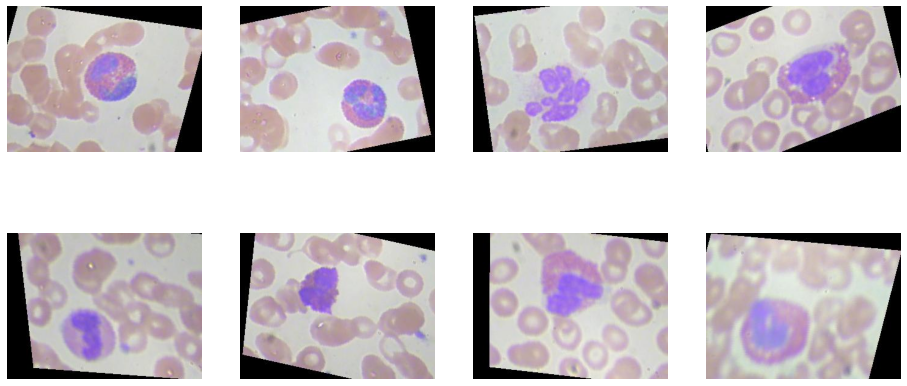

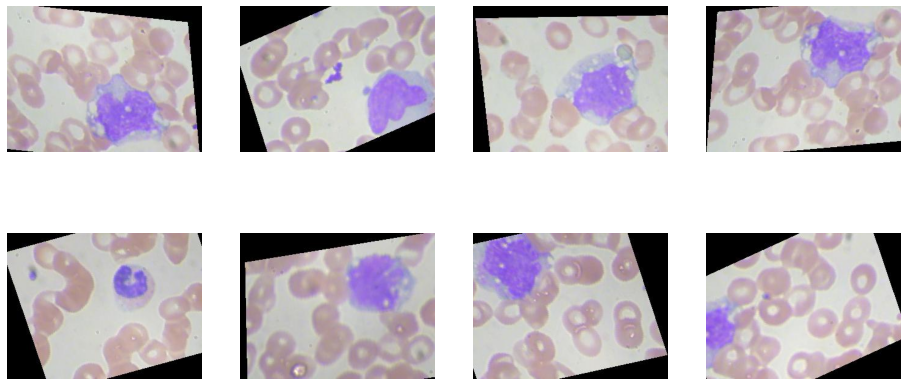

In [11]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
agroup_pix = [os.path.join(Eosinophil, fname) 
                for fname in Eosinophil_names[pic_index-8:pic_index]]


bgroup_pix = [os.path.join(Lymphocyte, fname) 
                for fname in Lymphocyte_names[pic_index-8:pic_index]]

print()
for i, img_path in enumerate(agroup_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(bgroup_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap=plt.get_cmap('gray'))

plt.show()

## Creating the deep learning model with keras

In [12]:
batch_size = 128

In [13]:
batch_size = 128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
  # All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        'TRAIN/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
         classes = ['Eosinophil','Lymphocyte','Monocyte','Neutrophil'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    'TRAIN/',# same directory as training data
    target_size=(200, 200),
    batch_size=batch_size,
    classes = ['Eosinophil','Lymphocyte','Monocyte','Neutrophil'],
    class_mode='categorical',
    subset='validation')



Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.


In [14]:
import tensorflow as tf

In [15]:


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 4 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

C:\Users\ajays\anaconda3\envs\machinelearningclimatechange\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
total_sample=train_generator.n

In [19]:
n_epochs = 20

In [ ]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch = train_generator.samples // batch_size,
        validation_steps = validation_generator.samples // batch_size,
        validation_data = validation_generator,
 
        epochs=n_epochs,
        verbose=1)

## Training accuracy with epochs

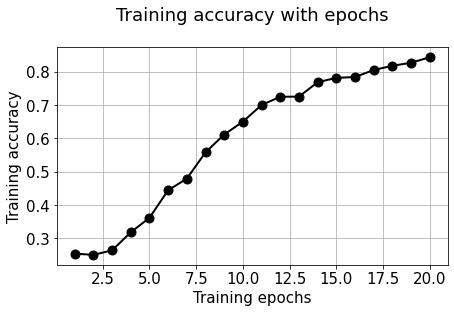

In [17]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Training loss with epochs

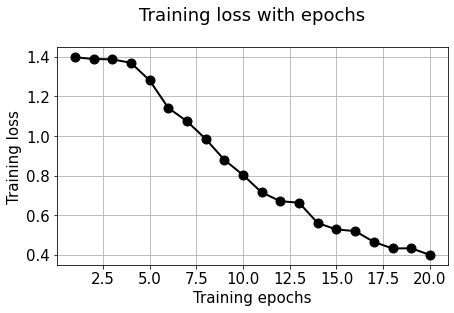

In [18]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Saving the model weights

In [2]:
model.save_weights('trained_weights.h5')

NameError: name 'model' is not defined

In [1]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'model' is not defined

## Getting predictions from single image

In [1]:
from keras.models import model_from_json
import predict

In [9]:
file_name="_0_630.jpeg"

In [10]:
import numpy as np
# def predict_image(img):
    
class_value=predict.predicion(file_name)

    
    


2


In [11]:
if(class_value==0):
    print("The given image was Eosinophil class")
elif(class_value==1):
    print("The given image was Lymphocyte class")
elif(class_value==2):
    print("The given image was Monocyte class")
elif(class_value==3):
    print("The given image was Neutrophil class")

The given image was Monocyte class


In [1]:
%%writefile app.y

import streamlit as st
import tensorflow as tf
st.set_option('deprecation.showfileUploaderencoding',Flase)

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/White blood cell/trained_weiights.hs')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Overwriting app.y


In [2]:
!ngrok authtoken 29yMmCt1JKL4ViwQk5j0iVhW5KA_2ZencZHe5fEKHw4GY4dbv

Authtoken saved to configuration file: C:\Users\ajays/.ngrok2/ngrok.yml


In [4]:
!nohup streamlit run app.py

'nohup' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!pip install ngrok

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ajays\anaconda3\envs\machinelearningclimatechange\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ajays\\AppData\\Local\\Temp\\pip-install-41pyxzfw\\ping_00eb2a808d6b4e83aa3a6f64e44f0e41\\setup.py'"'"'; __file__='"'"'C:\\Users\\ajays\\AppData\\Local\\Temp\\pip-install-41pyxzfw\\ping_00eb2a808d6b4e83aa3a6f64e44f0e41\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\ajays\AppData\Local\Temp\pip-pip-egg-info-4j_jx00e'
         cwd: C:\Users\ajays\AppData\Local\Temp\pip-install-41pyxzfw\ping_00eb2a808d6b4e83aa3a6f64e44f0e41\
    Complete output (8 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in 


  Created wheel for ngrok: filename=ngrok-0.0.1-py3-none-any.whl size=2349 sha256=301df9816b05be60427e7430422b289b2b81ea993093b9aea163fd8d1ae74a4d
  Stored in directory: c:\users\ajays\appdata\local\pip\cache\wheels\65\a4\bb\286612ce491fa8c2c81daee40e6dae45f353a7f1e353c55d36
Successfully built ngrok


      File "C:\Users\ajays\AppData\Local\Temp\pip-install-41pyxzfw\ping_00eb2a808d6b4e83aa3a6f64e44f0e41\setup.py", line 23, in <module>
        from ping import __version__
      File "C:\Users\ajays\AppData\Local\Temp\pip-install-41pyxzfw\ping_00eb2a808d6b4e83aa3a6f64e44f0e41\ping.py", line 196
        except socket.error, (errno, msg):
                           ^
    SyntaxError: invalid syntax
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ajays\anaconda3\envs\machinelearningclimatechange\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ajays\\AppData\\Local\\Temp\\pip-install-41pyxzfw\\ping_1052685e485441b5b8d7ad6470cd53e4\\setup.py'"'"'; __file__='"'"'C:\\Users\\ajays\\AppData\\Local\\Temp\\pip-install-41pyxzfw\\ping_1052685e485441b5b8d7ad6470cd53e4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'fr

In [25]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
!pip install wget

In [27]:
!unzip ngrok-stable-linux-amd64.zip

unzip:  cannot find either ngrok-stable-linux-amd64.zip or ngrok-stable-linux-amd64.zip.zip.


In [28]:
get_ipython().system_raw('./ngrok http 8501 &')

In [29]:

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

  File "<string>", line 1
    'import
           ^
SyntaxError: EOL while scanning string literal


In [ ]:
!streamlit run /content/app.py